In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('.\\Data4ML\\train.csv')
test = pd.read_csv('.\\Data4ML\\test.csv')

In [3]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Y_train = train['label']
Y_train
X_train = train.drop(labels=['label'],axis=1)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

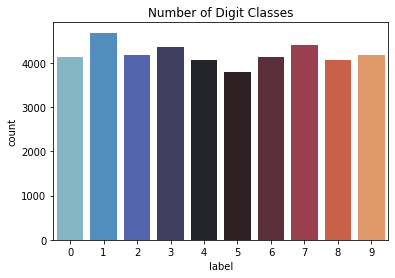

In [35]:
g = sns.countplot(Y_train,palette="icefire")
plt.title("Number of Digit Classes")
Y_train.value_counts()

In [36]:
# Normalization of the data
X_train = X_train/255.0
test = test /255.0
X_train.shape, test.shape

((42000, 784), (28000, 28, 28, 1))

In [40]:
# reshape the 
X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [41]:
# lable Encoding 
from keras.utils.np_utils import to_categorical    # this will convert to one-hot-encoding
Y_train = to_categorical(Y_train,num_classes=10)


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train,test_size=0.2,random_state=7)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

(28, 28, 1)

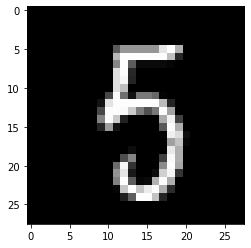

In [67]:
plt.imshow(X_train[0][:,:,0],cmap='gray')
X_train[0].shape

In [68]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical     # convert to one-hot-encoding
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [75]:
model  = Sequential()
model.add(Conv2D(filters=32, kernel_size= (5,5), padding ="Same", activation = 'relu', input_shape =(28,28,1)))
model.add(Conv2D(filters=32, kernel_size= (5,5), padding ="Same", activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size= (3,3), padding ="Same", activation = 'relu', input_shape =(28,28,1)))
model.add(Conv2D(filters=64, kernel_size= (3,3), padding ="Same", activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))


In [76]:
optimizer = RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

In [77]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 20
batch_size = 378

In [82]:
# data_augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,   # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,    # dimesion reduction
        rotation_range=10,      # randomly rotate images in the range 10 degrees
        zoom_range=0.1,       # Randomly zoom image 10%
        width_shift_range=0.1,    # randomly shift images horizontally 10%
        height_shift_range=0.1,   # randomly shift images vertically 10%
        horizontal_flip=False,     # randomly flip images
        vertical_flip=False       # randomly flip images
)

datagen.fit(X_train)

In [ ]:
# fit the model
history = model.fit_generator(
            datagen.flow(X_train,Y_train,batch_size=378),
            epochs= 1,
            validation_data=(X_val,Y_val),
            steps_per_epoch=X_train.shape[0]   # batch_size
)
# this will take time to train the dataset. its depends on your CPU/GPU 

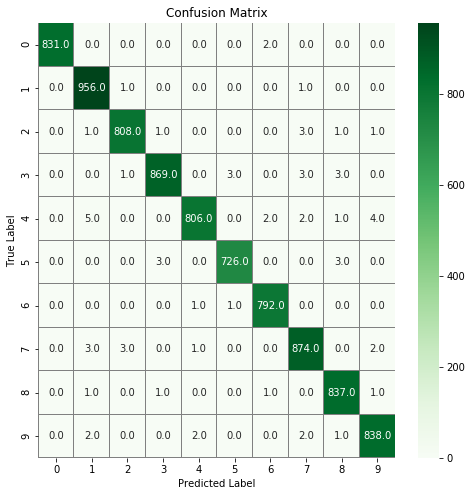

In [86]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()